In [1]:
import os
os.environ['PATH'] += ':ffmpeg-3.4.2-64bit-static'

# Setup

In [2]:
exp_directory = 'results'
agent_name = 'DeepQAgent'
game_name = 'Enduro'
render_mode='rgb_array'

### Global Modules

In [3]:
import os
import datetime
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from gym.wrappers import Monitor

### Local Modules

In [4]:
import base
from src.agents import DeepQAgent, A3CAgent
from src.util import BaseCallback, JupyterCallback
from src.environment.atari import build_atari_environment

/usr/local/anaconda5/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/usr/local/anaconda5/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


## Constants

In [5]:
agents = {
    DeepQAgent.__name__: DeepQAgent,
    A3CAgent.__name__: A3CAgent,
}

#### Output Directory

In [6]:
# setup the experiment directory
now = datetime.datetime.today().strftime('%Y-%m-%d_%H-%M')
exp_directory = '{}/{}/{}/{}'.format(exp_directory, game_name, agent_name, now)
if not os.path.exists(exp_directory):
    os.makedirs(exp_directory)
exp_directory

'results/Enduro/DeepQAgent/2018-04-16_19-43'

In [7]:
plot_dir = '{}/plots'.format(exp_directory)
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)
plot_dir

'results/Enduro/DeepQAgent/2018-04-16_19-43/plots'

# Environment

In [8]:
env = build_atari_environment(game_name)
env = Monitor(env, '{}/monitor'.format(exp_directory), force=True)

In [9]:
env.observation_space

Box(84, 84, 4)

In [10]:
env.action_space

Discrete(9)

# Agent

In [11]:
agent = agents[agent_name](env, render_mode=render_mode)
agent

DeepQAgent(
    env=<Monitor<FrameStackEnv<ClipRewardEnv<PenalizeDeathEnv<DownsampleEnv<FireResetEnv<MaxFrameskipEnv<NoopResetEnv<TimeLimit<AtariEnv<EnduroNoFrameskip-v4>>>>>>>>>>>,
    render_mode='rgb_array'
    replay_memory_size=1000000,
    discount_factor=0.99,
    update_frequency=4,
    optimizer=<keras.optimizers.Adam object at 0x2ac668148160>,
    exploration_rate=AnnealingVariable(initial_value=1.0, final_value=0.1, steps=1000000),
    loss=huber_loss,
    target_update_freq=10000,
    dueling_network=True
)

In [12]:
# write some info about the agent to disk
with open('{}/agent.py'.format(exp_directory), 'w') as agent_file:
    agent_file.write(repr(agent))

## Initial

In [13]:
initial = agent.play()
initial = pd.Series(initial)
initial

100%|██████████| 100/100 [16:32<00:00,  9.93s/game]


0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.0
     ... 
70    0.0
71    0.0
72    0.0
73    0.0
74    0.0
75    0.0
76    0.0
77    0.0
78    0.0
79    0.0
80    0.0
81    0.0
82    0.0
83    0.0
84    0.0
85    0.0
86    0.0
87    0.0
88    0.0
89    0.0
90    0.0
91    0.0
92    0.0
93    0.0
94    0.0
95    0.0
96    0.0
97    0.0
98    0.0
99    0.0
Length: 100, dtype: float64

In [14]:
initial.to_csv('{}/initial.csv'.format(exp_directory))

In [15]:
initial.describe()

count    100.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
dtype: float64

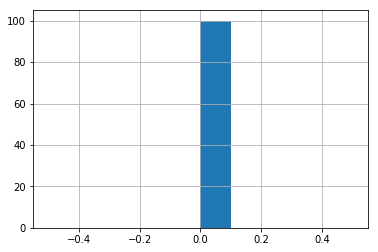

In [16]:
initial.hist()
plt.savefig('{}/initial.pdf'.format(plot_dir))

## Training

In [17]:
agent.observe()

53155frame [01:08, 780.50frame/s]                        


In [18]:
callback = BaseCallback()

In [19]:
agent.train(callback=callback)

10003304frame [18:42:15, 149.43frame/s, loss=19.9, score=483]                                 


In [20]:
# save the training results
scores = pd.Series(callback.scores)
scores.to_csv('{}/scores.csv'.format(exp_directory))
losses = pd.Series(callback.losses)
losses.to_csv('{}/losses.csv'.format(exp_directory))

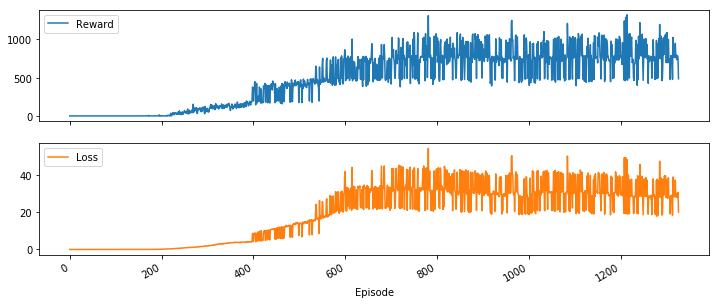

In [21]:
train = pd.concat([scores, losses], axis=1)
train.columns = ['Reward', 'Loss']
train.index.name = 'Episode'
_ = train.plot(figsize=(12, 5), subplots=True)
plt.savefig('{}/training.pdf'.format(plot_dir))

## Final

In [22]:
final = agent.play()
final = pd.Series(final)
final

100%|██████████| 100/100 [1:14:47<00:00, 44.87s/game]


0     1076.0
1      726.0
2     1048.0
3      778.0
4      793.0
5     1331.0
6     1284.0
7     1350.0
8     1048.0
9     1551.0
10    1553.0
11    1372.0
12    1053.0
13    1023.0
14    1019.0
15    1011.0
16    1023.0
17    1331.0
18     997.0
19    1319.0
20    1084.0
21    1018.0
22    1029.0
23    1073.0
24    1067.0
25    1068.0
26    1069.0
27     948.0
28    1395.0
29    1340.0
       ...  
70    1648.0
71    1045.0
72    1009.0
73    1075.0
74    1027.0
75    1078.0
76    1376.0
77    1099.0
78    1385.0
79    1048.0
80    1085.0
81    1265.0
82    1039.0
83    1054.0
84    1087.0
85    1331.0
86     985.0
87    1396.0
88     990.0
89    1574.0
90    1310.0
91     973.0
92    1022.0
93     959.0
94    1061.0
95    1033.0
96    1052.0
97    1268.0
98    1091.0
99    1057.0
Length: 100, dtype: float64

In [23]:
final.to_csv('{}/final.csv'.format(exp_directory))

In [24]:
final.describe()

count     100.000000
mean     1182.980000
std       232.734339
min       726.000000
25%      1027.750000
50%      1075.000000
75%      1351.750000
max      1839.000000
dtype: float64

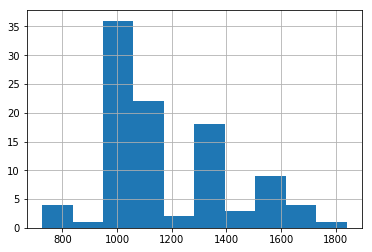

In [25]:
final.hist()
plt.savefig('{}/final.pdf'.format(plot_dir))

## Saving Weights

In [26]:
agent.model.save_weights('{}/weights.h5'.format(exp_directory), overwrite=True)